In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
df = pd.read_sql_table('attrition_records', 'sqlite:///attr_data.db')

df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

# Data Cleaning

'''Loooking at then fact that we have some categorical features, an easier method of making use of them is to convert them
into labels. The function below uses label encoder from sklearn to encode the features of the dataset.'''

In [12]:
# Using label encoder 
from sklearn.preprocessing import LabelEncoder

encoder  = LabelEncoder()
columns = [column for column in df.columns if df[column].dtypes == 'object']
def encode(data):
    for column in columns:
        data[column] = encoder.fit_transform(data[column])
    return data


In [13]:
df_1 = encode(df)
df_1.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2


# Data Exploration 

correlation is used to find whether a relationship exist between variables.it can also be  use to see the similarities 
 between features of dataset

In [14]:
corr = df_1.corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
id                         -0.010369
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Y

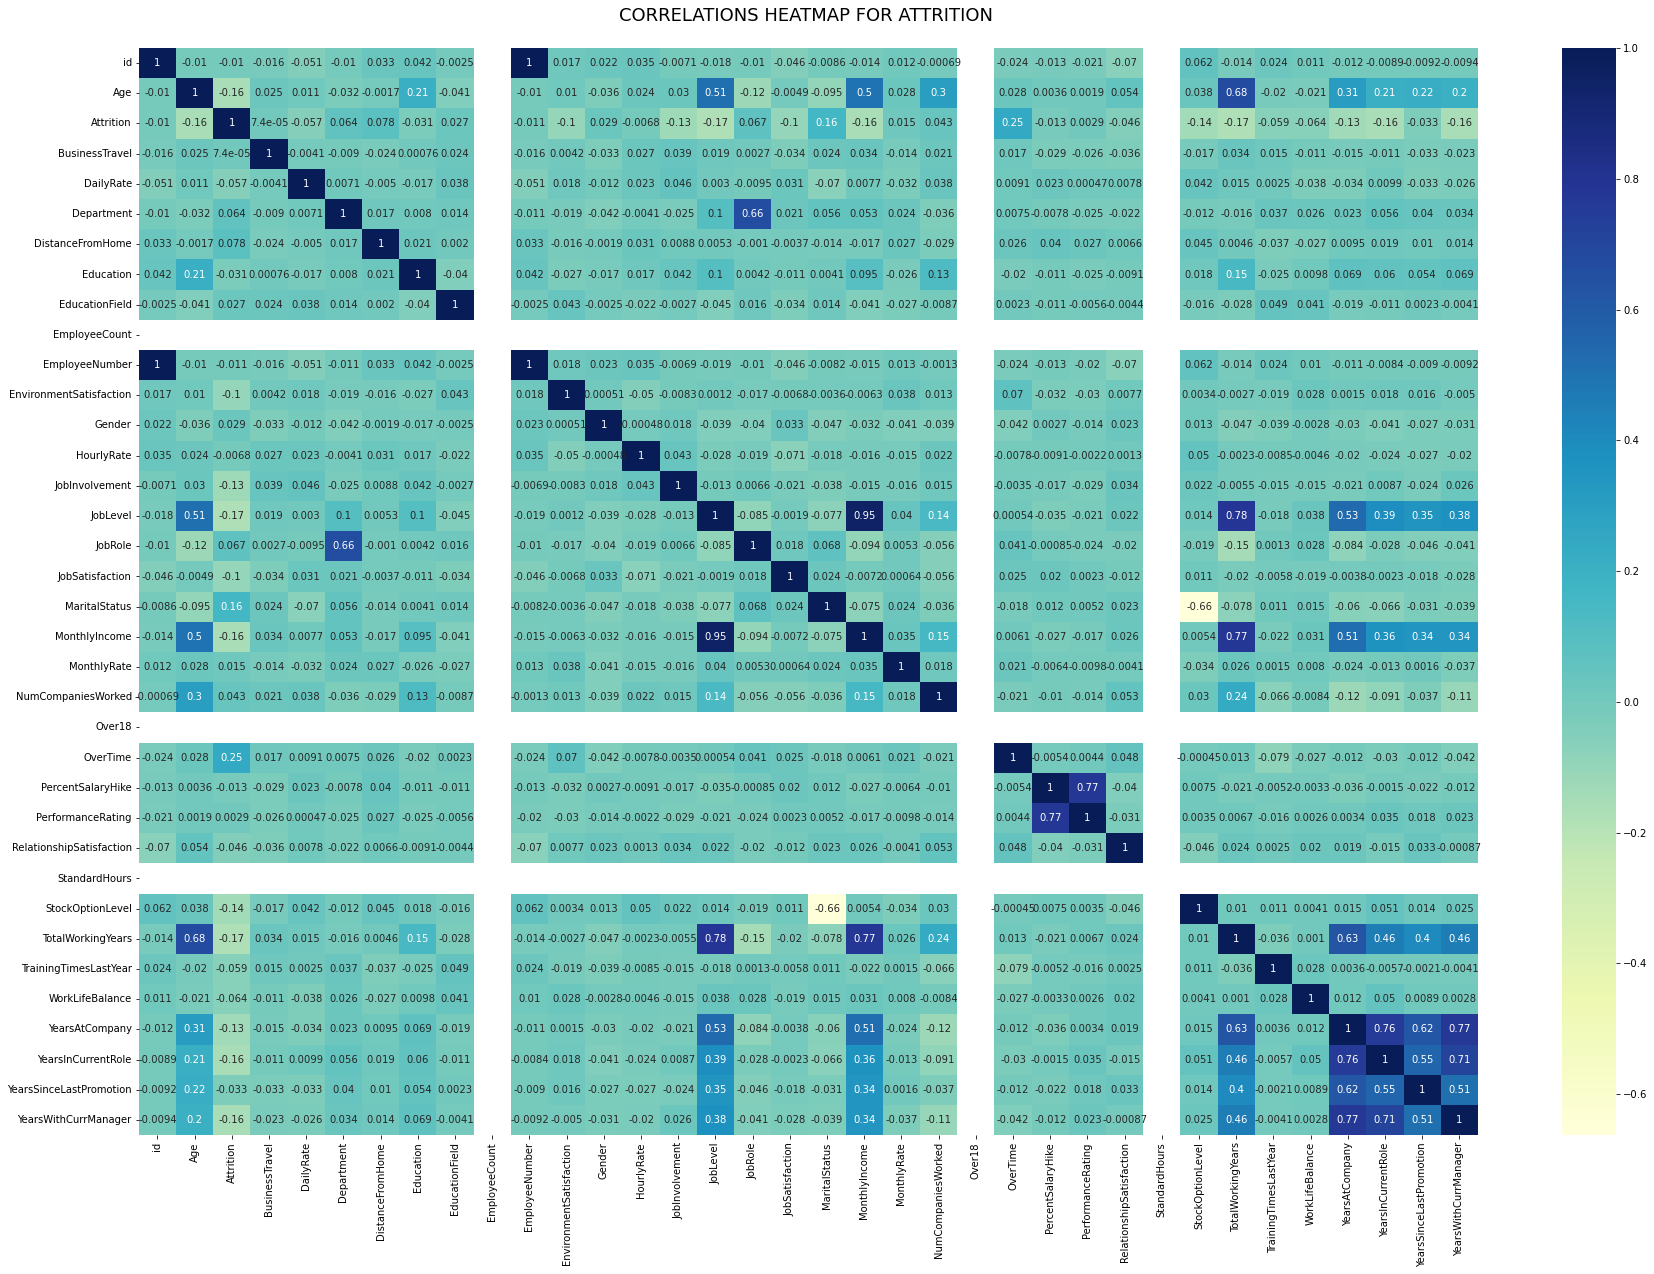

In [23]:
# Correlation matrix plot.
plt.figure(figsize=(30, 20))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("correlations heatmap for attrition \n".upper(), fontdict={'fontsize':18},loc='center')
plt.show()


### What do you think are the 3 factors behind employee attrition?

Looking at the correlation result and the correlation matrix, it is seen that overtime, marital status, and distance from home are factors that causes attrition.
This is correct because all the mentioned factors are all categorical features.

### What is the relationship between Education and Monthly Income?

In [17]:
# Taking a look at the correlation again, and considering Education.

corr['Education'].sort_values(ascending=False)

Education                   1.000000
Age                         0.208034
TotalWorkingYears           0.148280
NumCompaniesWorked          0.126317
JobLevel                    0.101589
MonthlyIncome               0.094961
YearsAtCompany              0.069114
YearsWithCurrManager        0.069065
YearsInCurrentRole          0.060236
YearsSinceLastPromotion     0.054254
JobInvolvement              0.042438
EmployeeNumber              0.042070
id                          0.041901
DistanceFromHome            0.021042
StockOptionLevel            0.018422
HourlyRate                  0.016775
WorkLifeBalance             0.009819
Department                  0.007996
JobRole                     0.004236
MaritalStatus               0.004053
BusinessTravel              0.000757
RelationshipSatisfaction   -0.009118
PercentSalaryHike          -0.011111
JobSatisfaction            -0.011296
Gender                     -0.016547
DailyRate                  -0.016806
OverTime                   -0.020322
P

In [18]:
# Considering Monthly Income

corr['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.950300
TotalWorkingYears           0.772893
YearsAtCompany              0.514285
Age                         0.497855
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
NumCompaniesWorked          0.149515
Education                   0.094961
Department                  0.053130
MonthlyRate                 0.034814
BusinessTravel              0.034319
WorkLifeBalance             0.030683
RelationshipSatisfaction    0.025873
DailyRate                   0.007707
OverTime                    0.006089
StockOptionLevel            0.005408
EnvironmentSatisfaction    -0.006259
JobSatisfaction            -0.007157
id                         -0.014377
EmployeeNumber             -0.014829
JobInvolvement             -0.015271
HourlyRate                 -0.015794
DistanceFromHome           -0.017014
PerformanceRating          -0.017120
TrainingTimesLastYear      -0.021736
P

Better visualisations..

<Figure size 2160x720 with 0 Axes>

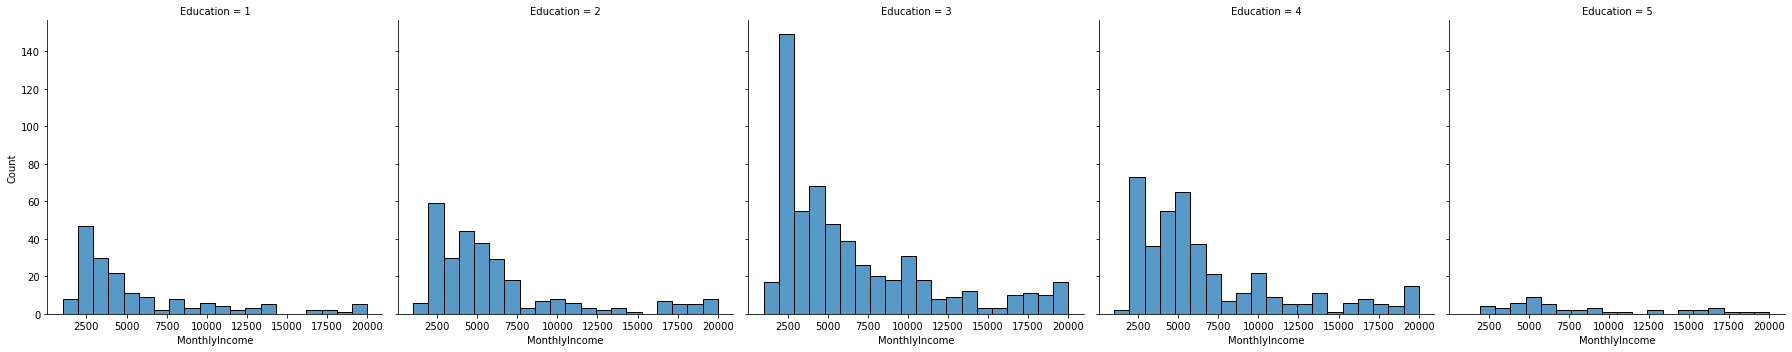

In [21]:
plt.figure(figsize=(30, 10))

sns.displot(df_1, x="MonthlyIncome", col="Education")

 When comparing their education in relation with their monthly income, it was deduced that the higher the education qualifications the higher the monthy income, also the low income earners carry the majority count in relation to their monthly income

### What is the effect of age on attrition?

In [24]:
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
id                         -0.010369
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Y

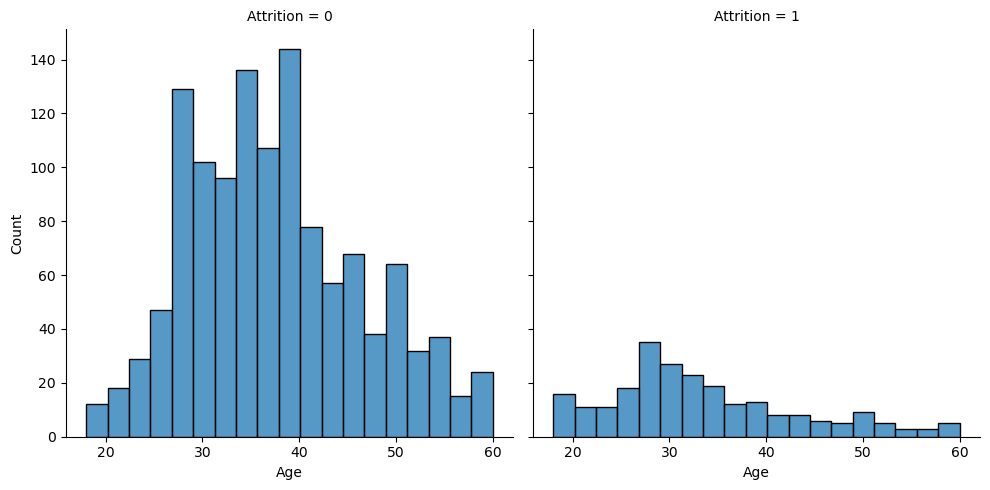

In [50]:
# Checking a displot

sns.displot(df_1, col="Attrition", x="Age")

With the help of the plot,employees in their mid-age(ranging between 20 and 60) attrited.

### Is Income the main factor in employee attrition?


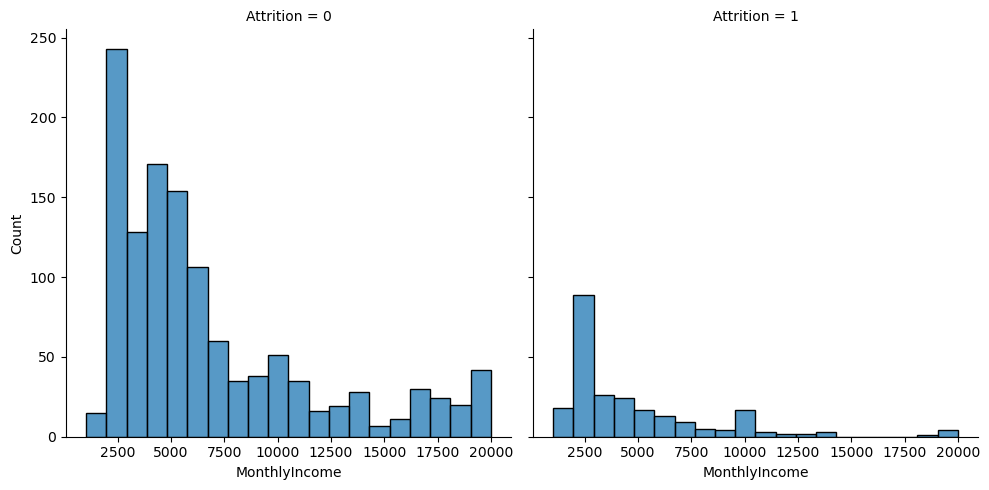

In [39]:
sns.displot(df_1, x="MonthlyIncome", col="Attrition")

The plot above shows that there are people with high income that also have attrition just like employees with
low incomes. hence, monthly income is not the main factor for employee attrition but a factor that causes attrition. if monthly income is the  only/main factor causing attrition, high income emplyoees(as seen in the plot) will not experience attrition.

### How does work-life balance impact the overall attrition rate?

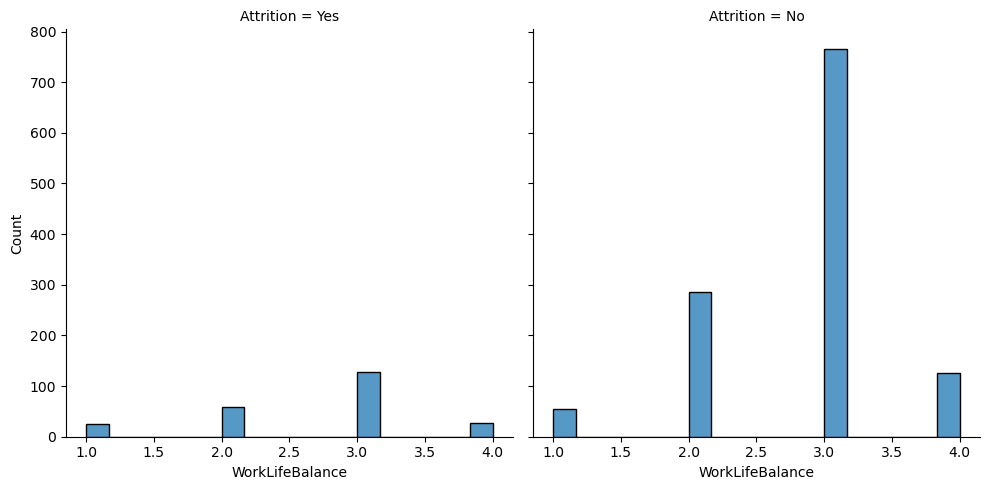

In [41]:
sns.displot(df, x="WorkLifeBalance", col="Attrition")

The plot above shows that majority of people with attrition have lower work-life balance, hence we can say that work-life balance affects the overall attrition rate.